In [6]:
import importlib
import VAR

importlib.reload(VAR)


<module 'VAR' from 'C:\\New folder\\Hope AI\\Time Series\\Multivariate\\VAR.py'>

Data split into train and test sets: 17520 training samples, 4380 test samples.
Fitting VAR model
Forecasting with VAR model
VAR forecasted values with length: 4380
VAR Evaluation Results: {'Network_Traffic': (35.77029628521334, 0.38204950195253784), 'Latency (ms)': (20.213012347854793, 0.177444352894996), 'Packet_Loss (%)': (0.02933028176231487, 5.914709349767367)}
Forecast saved to var_forecast.csv
Evaluation results saved to var_evaluation_results.csv


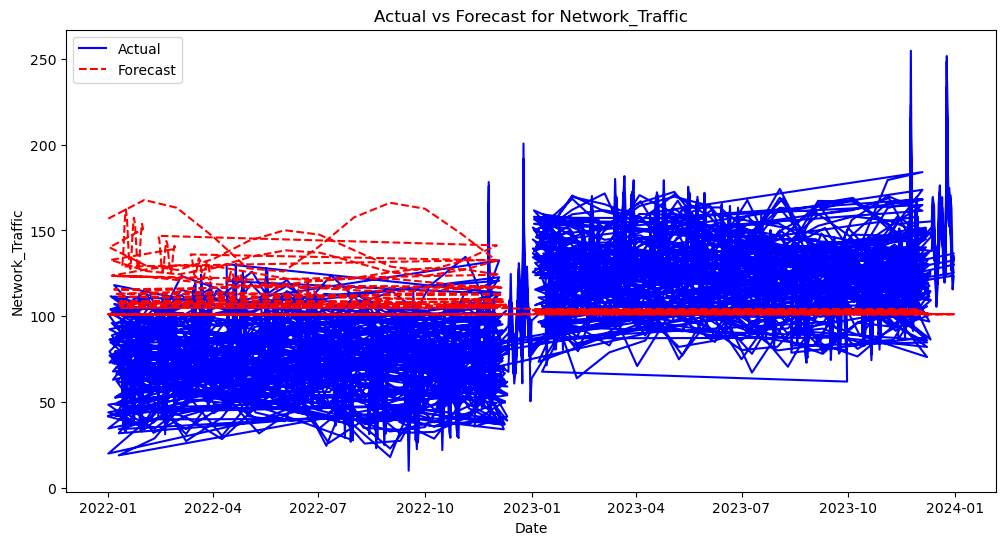

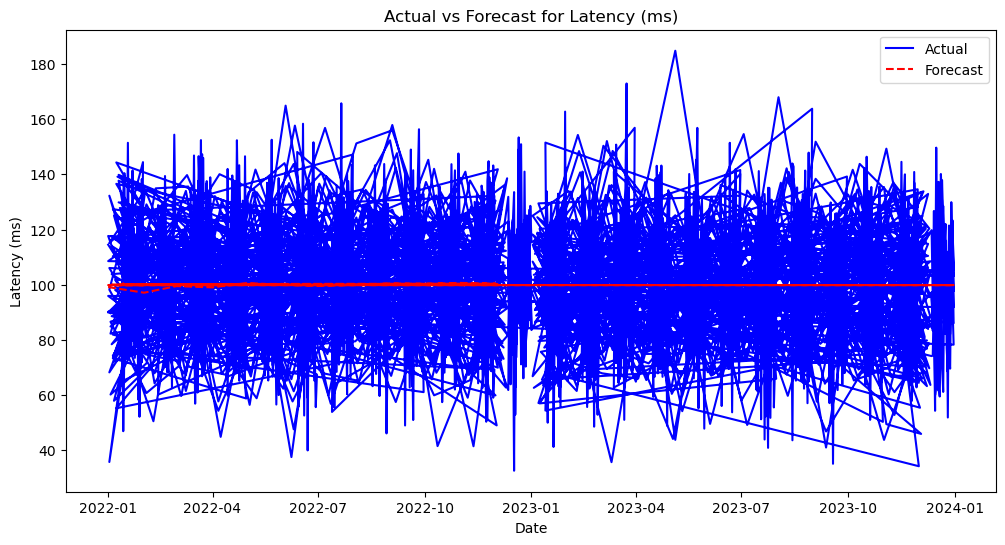

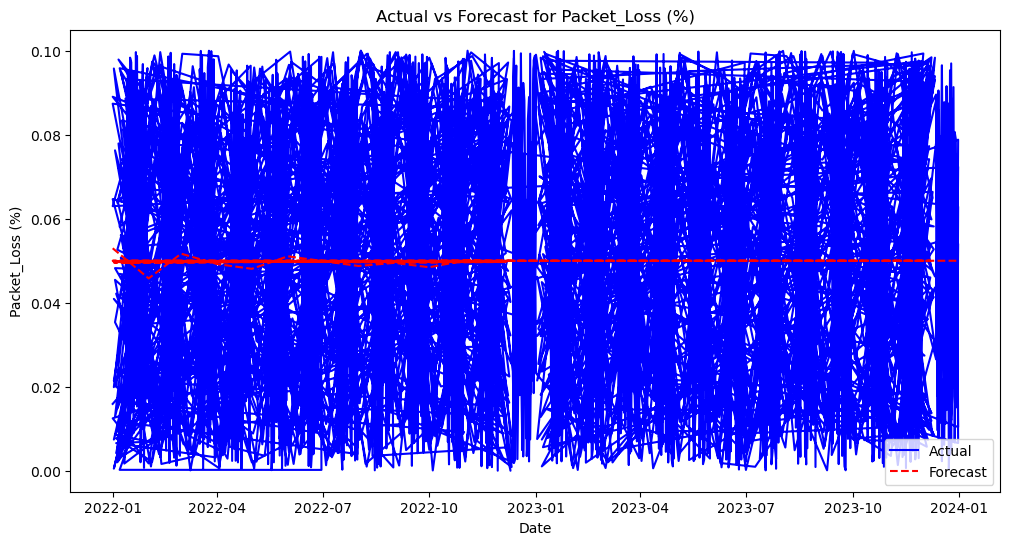

In [8]:
import pandas as pd
from VAR import TimeSeriesForecasting

# Load your data
data_path = 'C:\\New folder\\Hope AI\\Time Series\\TSA_Project\\enhanced_network_traffic_data.csv'
data = pd.read_csv(data_path, index_col=0, parse_dates=True)

# Initialize the model
model = TimeSeriesForecasting(data)

# Prepare data
model.prepare_data()

# Fit and forecast VAR
var_model_fit = model.fit_var(model.train)
var_forecast = model.forecast_var(var_model_fit, steps=len(model.test))

# Evaluate and print results
var_results = model.evaluate_forecast(model.test, var_forecast, ['Network_Traffic', 'Latency (ms)', 'Packet_Loss (%)'])
print("VAR Evaluation Results:", var_results)

# Save forecasts and evaluation results
model.save_forecast(var_forecast, 'var_forecast.csv')
model.save_evaluation_results(var_results, 'var_evaluation_results.csv')

# Plot forecasts
for column in ['Network_Traffic', 'Latency (ms)', 'Packet_Loss (%)']:
    model.plot_forecast(model.test, var_forecast, [column])
